In [1]:

!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from PIL import Image

In [3]:
DATA_DIR = r"C:\fyp_manish_shyam_phase2\MedPix-2.0-main\MedPix-2.0-main\MedPix-2-0"      

IMG_DIR = os.path.join(DATA_DIR, "images")
CASE_FILE = os.path.join(DATA_DIR, "Case_topic.json")
DESC_FILE = os.path.join(DATA_DIR, "Descriptions.json")
IMG_OVR = os.path.join(DATA_DIR, "images_overview.csv")

In [4]:
print(IMG_DIR)
print(CASE_FILE)
print(DESC_FILE)
print(IMG_OVR)

C:\fyp_manish_shyam_phase2\MedPix-2.0-main\MedPix-2.0-main\MedPix-2-0\images
C:\fyp_manish_shyam_phase2\MedPix-2.0-main\MedPix-2.0-main\MedPix-2-0\Case_topic.json
C:\fyp_manish_shyam_phase2\MedPix-2.0-main\MedPix-2.0-main\MedPix-2-0\Descriptions.json
C:\fyp_manish_shyam_phase2\MedPix-2.0-main\MedPix-2.0-main\MedPix-2-0\images_overview.csv


In [5]:
# Load case-level info
with open(CASE_FILE, "r") as f:
    case_data = json.load(f)

# Load image-level info
with open(DESC_FILE, "r") as f:
    desc_data = json.load(f)

# Create quick lookup: image_name -> description
desc_index = {item["image"]: item for item in desc_data}

In [6]:
print(desc_index)

{'MPX1009_synpic46283': {'Type': 'CT', 'U_id': 'MPX1009', 'image': 'MPX1009_synpic46283', 'Description': {'ACR Codes': '8.-1', 'Age': '73', 'Caption': 'The prostate is enlarged with several calcifications  noted within.  No dominant prostate mass is evident.', 'Figure Part': None, 'Modality': 'CT - noncontrast', 'Plane': 'Coronal', 'Sex': 'male'}, 'Location': 'Genitourinary', 'Location Category': 'Reproductive and Urinary System'}, 'MPX1009_synpic46295': {'Type': 'CT', 'U_id': 'MPX1009', 'image': 'MPX1009_synpic46295', 'Description': {'ACR Codes': '8.-1', 'Age': '73', 'Caption': 'Bladder is prominent with mildly thickened wall. There is a small posteriolateral diverticulum on the rightward aspect.', 'Figure Part': None, 'Modality': 'CT - noncontrast', 'Plane': 'Axial', 'Sex': 'male'}, 'Location': 'Genitourinary', 'Location Category': 'Reproductive and Urinary System'}, 'MPX1024_synpic40275': {'Type': 'CT', 'U_id': 'MPX1024', 'image': 'MPX1024_synpic40275', 'Description': {'ACR Codes': 

In [7]:
print(json.dumps(case_data[0], indent=4))

{
    "U_id": "MPX1009",
    "TAC": [
        "MPX1009_synpic46283",
        "MPX1009_synpic46295"
    ],
    "MRI": [],
    "Case": {
        "Title": "Bladder Diverticulum",
        "History": "73-year-old male with hematuria and numerous white blood cells found on UA",
        "Exam": "N/A",
        "Findings": "Bladder with thickened wall and diverticulum on the right.  Diverticulum is mostly likely secondary to chronic outflow obstruction.\n\nProstate enlargement.",
        "Differential Diagnosis": "Bladder Diverticulum",
        "Case Diagnosis": "Bladder Diverticulum",
        "Diagnosis By": "N/A"
    },
    "Topic": {
        "Title": "Bladder Diverticulum",
        "Disease Discussion": "Bladder diverticula most often occur as a result of outlet obstruction.  Occasionally, a congenital weakness in the bladder wall adjacent to the ureteral orifice results in a diverticulum.  This is termed a \"Hutch\" diverticulum.\nIn children, outlet obstruction causing a diverticulum is ra

In [8]:
print(json.dumps(desc_data[0], indent=4))

{
    "Type": "CT",
    "U_id": "MPX1009",
    "image": "MPX1009_synpic46283",
    "Description": {
        "ACR Codes": "8.-1",
        "Age": "73",
        "Caption": "The prostate is enlarged with several calcifications  noted within.  No dominant prostate mass is evident.",
        "Figure Part": null,
        "Modality": "CT - noncontrast",
        "Plane": "Coronal",
        "Sex": "male"
    },
    "Location": "Genitourinary",
    "Location Category": "Reproductive and Urinary System"
}


In [9]:
print(os.listdir(IMG_DIR)[:20])

['MPX1007_synpic46719.png', 'MPX1007_synpic46720.png', 'MPX1007_synpic46721.png', 'MPX1007_synpic46722.png', 'MPX1009_synpic46283.png', 'MPX1009_synpic46295.png', 'MPX1012_synpic22949.png', 'MPX1012_synpic22950.png', 'MPX1014_synpic41745.png', 'MPX1014_synpic41746.png', 'MPX1014_synpic41747.png', 'MPX1014_synpic41748.png', 'MPX1016_synpic34317.png', 'MPX1016_synpic34318.png', 'MPX1020_synpic17477.png', 'MPX1020_synpic17478.png', 'MPX1022_synpic17356.png', 'MPX1022_synpic17357.png', 'MPX1024_synpic40275.png', 'MPX1024_synpic40277.png']


['MPX1007_synpic46719.png', 'MPX1007_synpic46720.png', 'MPX1007_synpic46721.png', 'MPX1007_synpic46722.png', 'MPX1009_synpic46283.png', 'MPX1009_synpic46295.png', 'MPX1012_synpic22949.png', 'MPX1012_synpic22950.png', 'MPX1014_synpic41745.png', 'MPX1014_synpic41746.png', 'MPX1014_synpic41747.png', 'MPX1014_synpic41748.png', 'MPX1016_synpic34317.png', 'MPX1016_synpic34318.png', 'MPX1020_synpic17477.png', 'MPX1020_synpic17478.png', 'MPX1022_synpic17356.png', 'MPX1022_synpic17357.png', 'MPX1024_synpic40275.png', 'MPX1024_synpic40277.png']


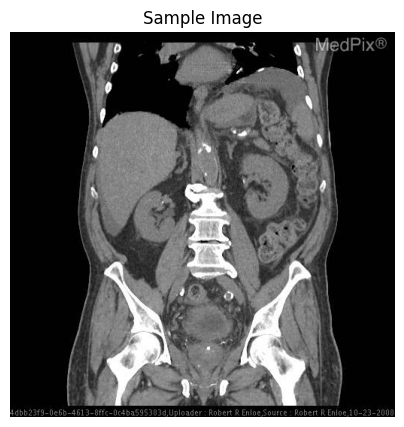

In [10]:
def load_image(img_name):
    path = os.path.join(IMG_DIR, img_name)
    print(os.listdir(IMG_DIR)[:20])

    return Image.open(path).convert("RGB")
def show_image(img, title="Image"):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

img = load_image("MPX1009_synpic46283.png")
show_image(img, title="Sample Image")

In [11]:
print("Total number of cases:", len(case_data))
print("Total number of image descriptions:", len(desc_data))
image_files = [f for f in os.listdir(IMG_DIR) if f.endswith(".png")]
print("Total PNG images:", len(image_files))

Total number of cases: 671
Total number of image descriptions: 2050
Total PNG images: 2050


In [12]:
ct_count = 0
mri_count = 0

for case in case_data:
    ct_count += len(case["TAC"])
    mri_count += len(case["MRI"])

print("Total CT images listed in Case_topic:", ct_count)
print("Total MRI images listed in Case_topic:", mri_count)

Total CT images listed in Case_topic: 1062
Total MRI images listed in Case_topic: 988


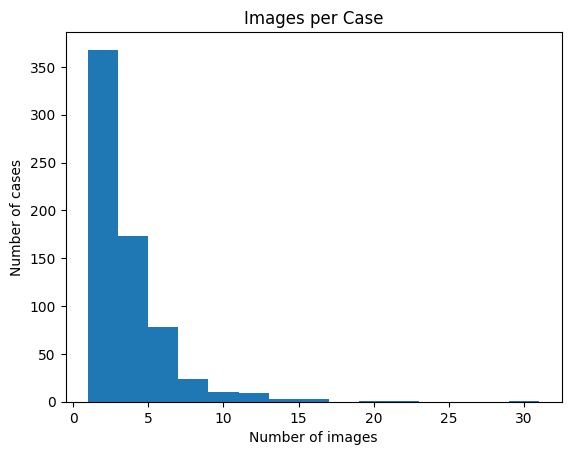

In [13]:
images_per_case = []

for case in case_data:
    total_imgs = len(case["TAC"]) + len(case["MRI"])
    images_per_case.append(total_imgs)

import matplotlib.pyplot as plt

plt.hist(images_per_case, bins=15)
plt.title("Images per Case")
plt.xlabel("Number of images")
plt.ylabel("Number of cases")
plt.show()

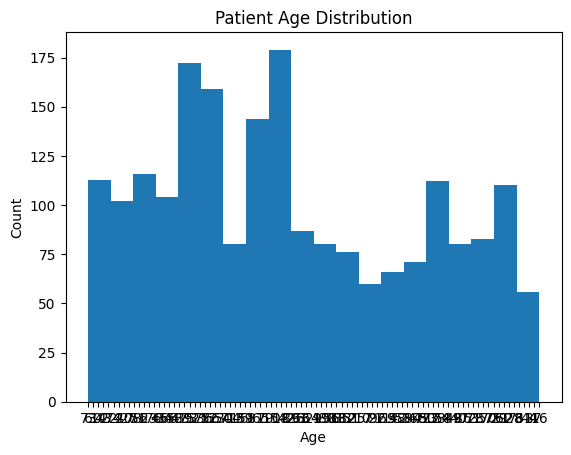

In [14]:
ages = []

for d in desc_data:
    age = d["Description"].get("Age", None)
    if age is not None:
        ages.append(age)

plt.hist(ages, bins=20)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

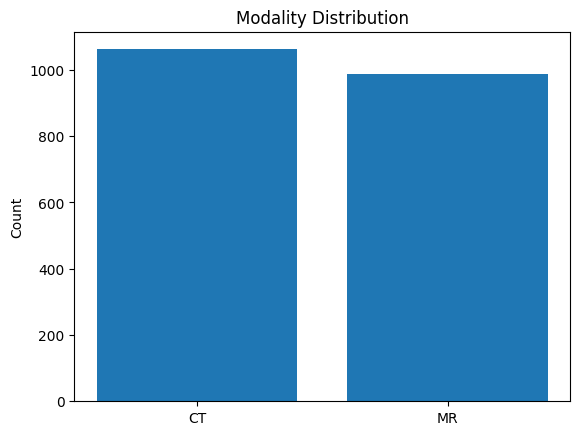

In [15]:
mod_count = {"CT":0, "MR":0}

for d in desc_data:
    mod_count[d["Type"]] += 1

plt.bar(mod_count.keys(), mod_count.values())
plt.title("Modality Distribution")
plt.ylabel("Count")
plt.show()

Missing Findings in case: {'Title': 'Sialolithiasis resulting in Sialoadenitis', 'History': 'Hx not provided', 'Exam': 'Physical exam not provided', 'Differential Diagnosis': 'Sialolithiasis resulting in Sialoadenitis', 'Case Diagnosis': 'Sialolithiasis resulting in Sialoadenitis', 'Treatment & Follow Up': 'Augmentin, fluids and sour candies. Follow up in 7 days.', 'Discussion': 'Sialolithiasis is an accumulation of hardened deposits in the salivary ducts. The most common site of occurrence is in the submandibular  (Warthon’) duct  which accounts for about 80% of all salivary duct stones.1  The large majority of cases occur in patients over 30 years of age with rare occurrences in children. The exact etiology of stone formation in the salivary ducts remains uncertain however it is believed to be the result from trauma, inflammation of the ductal epithelium or other processes which slow the movement of saliva down the salivary ducts resulting in stagnation. Patients typically present co

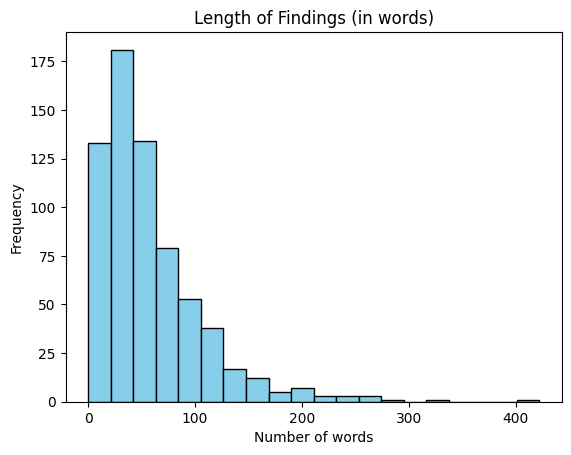

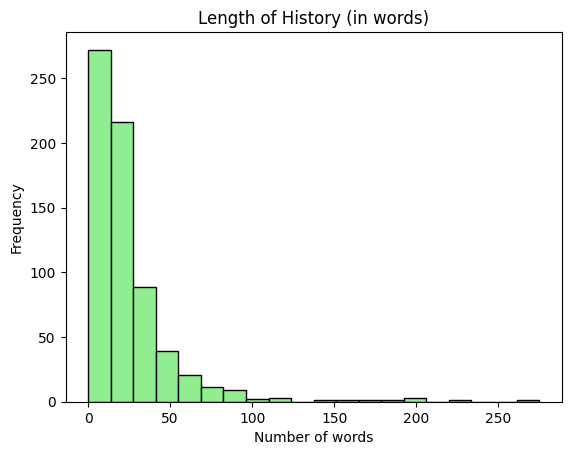

17 7


In [16]:
import matplotlib.pyplot as plt
import numpy as np

findings_len = []
history_len = []
c_f=0
c_h=0
for c in case_data:
    case = c.get("Case", {})

    # Debug: print if Findings or History is missing
    if "Findings" not in case:
        print("Missing Findings in case:", case)
        c_f+=1
    if "History" not in case:
        print("Missing History in case:", case)
        c_h+=1

    # Safely get Findings and History, default to empty string if missing
    f = case.get("Findings", "")
    h = case.get("History", "")

    # Count words
    findings_len.append(len(str(f).split()))
    history_len.append(len(str(h).split()))

# Plot histogram for Findings
plt.hist(findings_len, bins=20, color='skyblue', edgecolor='black')
plt.title("Length of Findings (in words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for History
plt.hist(history_len, bins=20, color='lightgreen', edgecolor='black')
plt.title("Length of History (in words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

print(c_f,c_h)

In [17]:
c = 0
for i in desc_data:
    if "Description" in i and "Caption" in i["Description"]:
        c += 1  # Count this caption
print("Total captions:", c)

Total captions: 2050


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


u_id_to_caption = defaultdict(str)
for d in desc_data:
    u_id = d.get("U_id")
    caption = d.get("Description", {}).get("Caption", "")
    if caption not in u_id_to_caption[u_id]:
        u_id_to_caption[u_id] += " " + caption


findings_len = []
history_len = []
c_f = 0
c_h = 0

for i, c in enumerate(case_data):
    case = c["Case"]
    u_id = c["U_id"]

    # Handle Findings
    if "Findings" not in case or not case.get("Findings"):
        print("Missing Findings in case:", case)
        c_f += 1
        case_data[i]["Case"]["Findings"] = u_id_to_caption.get(u_id)

    # Handle History
    if "History" not in case:
        print("Missing History in case:", case)
        c_h += 1
        case_data[i]["Case"]["History"] = ""

print("Cases missing Findings:", c_f)
print("Cases missing History:", c_h)

Missing Findings in case: {'Title': 'Sialolithiasis resulting in Sialoadenitis', 'History': 'Hx not provided', 'Exam': 'Physical exam not provided', 'Differential Diagnosis': 'Sialolithiasis resulting in Sialoadenitis', 'Case Diagnosis': 'Sialolithiasis resulting in Sialoadenitis', 'Treatment & Follow Up': 'Augmentin, fluids and sour candies. Follow up in 7 days.', 'Discussion': 'Sialolithiasis is an accumulation of hardened deposits in the salivary ducts. The most common site of occurrence is in the submandibular  (Warthon’) duct  which accounts for about 80% of all salivary duct stones.1  The large majority of cases occur in patients over 30 years of age with rare occurrences in children. The exact etiology of stone formation in the salivary ducts remains uncertain however it is believed to be the result from trauma, inflammation of the ductal epithelium or other processes which slow the movement of saliva down the salivary ducts resulting in stagnation. Patients typically present co

In [19]:
u_id_to_caption

defaultdict(str,
            {'MPX1009': ' The prostate is enlarged with several calcifications  noted within.  No dominant prostate mass is evident. Bladder is prominent with mildly thickened wall. There is a small posteriolateral diverticulum on the rightward aspect.',
             'MPX1024': ' CT of the chest reveals an obstructing mass and resultant LUL collapse.',
             'MPX1012': ' pelvis',
             'MPX1016': ' Contrast enhanced chest CT shows diffuse increased interstitial markings involving the right middle and lower lobes. Contrast enhanced chest CT shows pleural thickening/scarring of the posterior right lower lobe.',
             'MPX1035': ' Non-contrast CT axial view demonstrates a R occipital condyle fracture at the arrow. There is also a small amount of hemorrhage tracking posterior to the fracture.',
             'MPX1031': ' CT (3mm collimation) shows peripheral interlobular septal thickening with scattered focal consolidation and GGO.',
             'MPX10

In [20]:
from collections import defaultdict

unique_locations = defaultdict(set)
unique_location_categories = set()

for d in desc_data:
    unique_locations[d["Location"]].add(d["Location Category"])
    unique_location_categories.add(d["Location Category"])

for k in unique_locations: print(f"{k} => {unique_locations[k]}")

Genitourinary => {'Reproductive and Urinary System'}
Chest, Pulmonary => {'Thorax'}
Head and Neck => {'Head'}
Cardiovascular => {'Thorax'}
Brain and Neuro => {'Head'}
Abdomen => {'Abdomen'}
Spine => {'Spine and Muscles'}
Vascular => {'Abdomen', 'Reproductive and Urinary System', 'Thorax', 'Head'}
Eye and Orbit => {'Head'}
Gastrointestinal => {'Abdomen'}
Endocrine => {'Abdomen', 'Head'}
Musculoskeletal => {'Spine and Muscles'}
Pathology => {'Abdomen', 'Thorax'}
Generalized => {'Abdomen', 'Reproductive and Urinary System', 'Thorax', 'Head'}
Hematopoietic => {'Abdomen', 'Thorax'}
Dental, Oral, or Tooth => {'Head'}
Left Blank => {'Abdomen'}
Nerve, central => {'Head'}
Breast and Mammography => {'Thorax'}
Bethesda, MD => {'Abdomen'}
Ophthalmology => {'Head'}
Nerve, peripheral => {'Head'}


In [21]:
print(len(unique_location_categories))

5


In [22]:
print(unique_location_categories)

{'Thorax', 'Head', 'Spine and Muscles', 'Abdomen', 'Reproductive and Urinary System'}


In [23]:
# Create a mapping from U_id to Caption for faster lookup
u_id_to_desc = {d.get("U_id"): d
                   for d in desc_data}

In [24]:
from collections import defaultdict

key_count = defaultdict(int)

for c in case_data:
    case = c.get("Case", {})
    for key in case.keys():
        key_count[key] += 1  # Increment count if key exists

# Print the counts
for key, count in key_count.items():
    print(f"{key}: {count}")

Title: 671
History: 671
Exam: 527
Findings: 671
Differential Diagnosis: 637
Case Diagnosis: 671
Diagnosis By: 500
Discussion: 431
Treatment & Follow Up: 511
Media: 1


In [25]:
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)

    text = text.replace("\n", " ")   # remove newlines
    text = text.replace("\t", " ")   # remove tabs
    text = re.sub(r"\s+", " ", text) # collapse multiple spaces/tabs/newlines
    return text.strip()    

In [26]:
# df_overall
# U_id, Location Category, Location, list(CT), list(MRI), title, history, findings, case diagnosis, Differential Diagnosis, captions(concated)

import pandas as pd
from collections import defaultdict
import re
import numpy as np
# Example: suppose case_data is your array of JSON objects
# And desc_data is your array of JSON objects containing captions

data_list = []

for c in case_data:
    case = c["Case"]
    u_id = c["U_id"]

    # Extract lists (ensure default empty list if missing)
    ct_list = [os.path.join(IMG_DIR, path+".png") for path in c["TAC"]]
    mri_list = [os.path.join(IMG_DIR, path+".png") for path in c["MRI"]]

    # Extract other fields (use empty string if missing)
    title = clean_text(case["Title"])
    history = clean_text(case["History"])
    findings = clean_text(case["Findings"])
    case_diagnosis = clean_text(case["Case Diagnosis"])
    diff_diagnosis = clean_text(case.get("Differential Diagnosis", case_diagnosis))


    # Use concatenated captions from desc_data if any
    captions = u_id_to_caption[u_id]

    # Append a row dictionary
    data_list.append({
        "U_id": u_id,
        "Location Category": u_id_to_desc[u_id]["Location Category"],
        "Location": u_id_to_desc[u_id]["Location"],
        "CT_image_paths": ct_list,
        "MRI_image_paths": mri_list,
        "title": title,
        "history": history,
        "findings": findings,
        "case diagnosis": case_diagnosis,
        "Differential Diagnosis": diff_diagnosis,
        "captions": captions.strip()
    })

# Step 3: Construct DataFrame
df_overall = pd.DataFrame(data_list)


df_overall["combined_text"] = np.where(
    df_overall["findings"] != df_overall["captions"],
    df_overall["findings"] + " " + df_overall["captions"],
    df_overall["findings"]
)

# Optional: view the DataFrame
print(df_overall.head())

      U_id                Location Category          Location  \
0  MPX1009  Reproductive and Urinary System     Genitourinary   
1  MPX1024                           Thorax  Chest, Pulmonary   
2  MPX1012  Reproductive and Urinary System     Genitourinary   
3  MPX1016                           Thorax  Chest, Pulmonary   
4  MPX1035                             Head     Head and Neck   

                                      CT_image_paths MRI_image_paths  \
0  [C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...              []   
1  [C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...              []   
2  [C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...              []   
3  [C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...              []   
4  [C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...              []   

                                               title  \
0                               Bladder Diverticulum   
1  Left upper lobe collapse caused by an enlargin...   
2       

In [27]:
df_overall["findings"][0]

'Bladder with thickened wall and diverticulum on the right. Diverticulum is mostly likely secondary to chronic outflow obstruction. Prostate enlargement.'

In [28]:
df_overall["CT_image_paths"][0]

['C:\\fyp_manish_shyam_phase2\\MedPix-2.0-main\\MedPix-2.0-main\\MedPix-2-0\\images\\MPX1009_synpic46283.png',
 'C:\\fyp_manish_shyam_phase2\\MedPix-2.0-main\\MedPix-2.0-main\\MedPix-2-0\\images\\MPX1009_synpic46295.png']

In [29]:
df_overall.to_csv(r"C:\fyp_manish_shyam_phase2\data\df_overall.csv")

In [30]:
# Dictionary to store all the new dataframes
dfs_by_category = {}

for category in df_overall["Location Category"].unique():
    dfs_by_category[category] = df_overall[df_overall["Location Category"] == category]

In [31]:
for cat, df_cat in dfs_by_category.items():
    print(cat, df_cat.shape)

Reproductive and Urinary System (59, 12)
Thorax (132, 12)
Head (223, 12)
Abdomen (131, 12)
Spine and Muscles (126, 12)


In [32]:
import os

output_dir = r"C:\fyp_manish_shyam_phase2\data\split_by_location_category"
os.makedirs(output_dir, exist_ok=True)

for category, df_cat in dfs_by_category.items():
    safe_name = str(category).replace(" ", "_").replace("/", "-")
    df_cat.to_csv(f"{output_dir}/{safe_name}.csv", index=False)

In [33]:
!pip install radgraph

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/588.0 kB ? eta -:--:--
     ---------------------------------------- 588.0/588.0 kB 20.4 MB/s  0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for radgraph: filename=radgraph-0.1.18-py3-none-any.whl size=812708 sha256=df4971dbf0e59368658786381572c86ad0372db5f39e336c11f11d8c53feef24
  Stored in directory: C:\Users\Student\AppData\Local\Temp\pip-ephem-wheel-cache-jjp2mvzv\wheels\fb\3c\fb\214f5d5cdab2a0f9f0904fd81d7fd1134404100b4444554df8
Successfully built radgraph

   ----------- ---------------------------- 2/7 [pluggy]
   ----------------- ---------------------- 3/7 [jsonpickle]
   ---------------------------- ----------- 5/7 [pytest]
   ---------------------------- ----------- 5/7 [pytest]
   -----------------

  DEPRECATION: Building 'radgraph' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'radgraph'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
df_overall.columns

Index(['U_id', 'Location Category', 'Location', 'CT_image_paths',
       'MRI_image_paths', 'title', 'history', 'findings', 'case diagnosis',
       'Differential Diagnosis', 'captions', 'combined_text'],
      dtype='object')

In [35]:
# from radgraph import RadGraph
# import torch
# # Load RadGraph model on CPU
# model = RadGraph()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device) 
# print(f"Using device: {device}")

# # Function to extract RadGraph entities
# def extract_radgraph_entities(text):
#     if not text or text.strip() == "":
#         return {"anatomy": [], "observation": [], "uncertain": [], "relations": []}

#     result = model(text)  # inference on CPU
#     entities = result.get("entities", {})
#     relations = result.get("relations", [])

#     anatomy = []
#     observation = []
#     uncertain = []
#     rel_list = []

#     for ent_id, ent in entities.items():
#         label = ent.get("label")
#         if label == "ANAT-DP":
#             anatomy.append(ent["text"])
#         elif label == "OBS-DP":
#             observation.append(ent["text"])
#         elif label == "UNCERTAIN":
#             uncertain.append(ent["text"])

#     for rel in relations:
#         head = entities.get(rel["head"], {}).get("text", "")
#         tail = entities.get(rel["tail"], {}).get("text", "")
#         rel_list.append((head, rel["type"], tail))

#     return {
#         "anatomy": list(set(anatomy)),
#         "observation": list(set(observation)),
#         "uncertain": list(set(uncertain)),
#         "relations": rel_list
#     }

# # Apply RadGraph on your findings
# findings_list = df_overall["findings"].tolist()
# radgraph_output = [extract_radgraph_entities(text) for text in findings_list]

# # Add RadGraph columns to df_overall
# # df_overall["anatomy_terms"] = [x["anatomy"] for x in radgraph_output]
# # df_overall["observation_terms"] = [x["observation"] for x in radgraph_output]
# # df_overall["uncertain_terms"] = [x["uncertain"] for x in radgraph_output]
# # df_overall["relations"] = [x["relations"] for x in radgraph_output]

In [36]:
# print(radgraph_output)
# print(findings_list)

In [37]:
# from radgraph import RadGraph

# model = RadGraph()
# model.device = "cpu"
# model.model.to("cpu")

# sample_text = df_overall['findings'].iloc[0]
# result = model(sample_text)
# print(result)

In [38]:
!pip install git+https://github.com/stanford-aimi/radgraph.git

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/stanford-aimi/radgraph.git to c:\users\student\appdata\local\temp\pip-req-build-8g_k9kb0
  Resolved https://github.com/stanford-aimi/radgraph.git to commit adbf1c013f88aa18c35d0c420696071013c46101
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/stanford-aimi/radgraph.git 'C:\Users\Student\AppData\Local\Temp\pip-req-build-8g_k9kb0'

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#  radgraph install 

# from radgraph import RadGraph
# import pandas as pd
# import re

# # ----------------------------
# # Load RadGraph model on CPU
# # ----------------------------
# model = RadGraph()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device) 
# print(f"Using device: {device}")


# # ----------------------------
# # RadGraph extraction function
# # ----------------------------
# def extract_radgraph_entities(text):
#     if not text:
#         return {"anatomy": [], "observation": [], "uncertain": [], "relations": []}

#     result = model(text)        # Run inference
#     result = result["0"]        # Extract inner dict

#     entity_dict = result["entities"]

#     anatomy = []
#     observation = []
#     uncertain = []
#     relations_list = []

#     # ---- Parse entities ----
#     for ent_id, ent in entity_dict.items():
#         token = ent["tokens"]
#         label = ent["label"]

#         if label == "Anatomy::definitely present":
#             anatomy.append(token)

#         elif label == "Observation::definitely present":
#             observation.append(token)

#         elif "uncertain" in label.lower():
#             uncertain.append(token)

#         # Parse relations for each entity
#         for rel in ent["relations"]:
#             rel_type = rel[0]
#             tail_id = rel[1]
#             tail_text = entity_dict[tail_id]["tokens"] if tail_id in entity_dict else None

#             relations_list.append((token, rel_type, tail_text))

#     return {
#         "anatomy": list(set(anatomy)),
#         "observation": list(set(observation)),
#         "uncertain": list(set(uncertain)),
#         "relations": relations_list
#     }

# # ----------------------------
# # Apply RadGraph to entire column
# # ----------------------------

# temp_df = pd.DataFrame({
#     "text": df_overall["findings"]+ " " + df_overall["captions"]
# })

# radgraph_output = temp_df["text"].apply(extract_radgraph_entities)

# print(radgraph_output)

In [40]:
# radgraph_output.to_json(r"D:\fyp_manish_shyam_phase2\data\radgraph_output.json", orient="values", indent=4)

In [41]:


# import json
# from collections import defaultdict

# # ---------------------------------------
# # Initialize your final graph structure
# # ---------------------------------------
# ontology = {
#     "Abdomen": {"anatomy": [], "observation": [], "relations": []},
#     "Head": {"anatomy": [], "observation": [], "relations": []},
#     "Reproductive and Urinary System": {"anatomy": [], "observation": [], "relations": []},
#     "Spine and Muscles": {"anatomy": [], "observation": [], "relations": []},
#     "Thorax": {"anatomy": [], "observation": [], "relations": []}
# }

# # Convert lists to sets internally to avoid duplicates
# graph_sets = {
#     k: {
#         "anatomy": set(),
#         "observation": set(),
#         "relations": set()
#     }
#     for k in ontology
# }

# # ---------------------------------------
# # Loop over each record in df_overall
# # ---------------------------------------
# for idx, row in df_overall.iterrows():

#     # Get the correct category (this is your first-level key)
#     category = row["Location Category"]
#     rad = radgraph_output[idx]

#     for a in rad.get("anatomy", []):
#         graph_sets[category]["anatomy"].add(a)

#     for o in rad.get("observation", []):
#         graph_sets[category]["observation"].add(o)

#     for rel in rad.get("relations", []):
#         # Convert relation list → tuple ("thickened", "located_at", "wall")
#         graph_sets[category]["relations"].add(tuple(rel))


# for cat in ontology:
#     ontology[cat]["anatomy"] = list(graph_sets[cat]["anatomy"])
#     ontology[cat]["observation"] = list(graph_sets[cat]["observation"])
#     ontology[cat]["relations"] = [list(r) for r in graph_sets[cat]["relations"]]


# # ---------------------------------------
# # Save as JSON if desired
# # ---------------------------------------
# with open(r"D:\fyp_manish_shyam_phase2\data\ontology.json", "w") as f:
#     json.dump(ontology, f, indent=4)

In [42]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
df_overall.head()

,U_id,Location Category,Location,CT_image_paths,MRI_image_paths,title,history,findings,case diagnosis,Differential Diagnosis,captions,combined_text
0,MPX1009,Reproductive and Urinary System,Genitourinary,[C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...,[],Bladder Diverticulum,73-year-old male with hematuria and numerous w...,Bladder with thickened wall and diverticulum o...,Bladder Diverticulum,Bladder Diverticulum,The prostate is enlarged with several calcific...,Bladder with thickened wall and diverticulum o...
1,MPX1024,Thorax,"Chest, Pulmonary",[C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...,[],Left upper lobe collapse caused by an enlargin...,60-year-old woman presents with chest pain and...,• PA chest radiograph demonstrates left lung v...,Left upper lobe collapse caused by an enlargin...,This combination of radiographic findings are ...,CT of the chest reveals an obstructing mass an...,• PA chest radiograph demonstrates left lung v...
2,MPX1012,Reproductive and Urinary System,Genitourinary,[C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...,[],Ovarian torsion,"24 hours of pelvic, RLQ pain.",CT: Large heterogeneous pelvic mass displacing...,Ovarian torsion,"Ovarian Torsion Ovarian mass, benign vs. malig...",pelvis,CT: Large heterogeneous pelvic mass displacing...
3,MPX1016,Thorax,"Chest, Pulmonary",[C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...,[],Adenocarcinoma of the Lung,The patient is a 43-year-old female who presen...,Chest PA/LAT revealed increased interstitial m...,Adenocarcinoma of the Lung,lymphangitic spread of malignancy primary mali...,Contrast enhanced chest CT shows diffuse incre...,Chest PA/LAT revealed increased interstitial m...
4,MPX1035,Head,Head and Neck,[C:\fyp_manish_shyam_phase2\MedPix-2.0-main\Me...,[],Occipital Condyle Fractures,22yo M transported to the emergency department...,Axial and coronal CT of the head and cervical ...,Occipital Condyle Fractures,"Occipital condylar fracture Type I, II, or III",Non-contrast CT axial view demonstrates a R oc...,Axial and coronal CT of the head and cervical ...


In [46]:
import json

# Load ontology
with open(r"C:\fyp_manish_shyam_phase2\data\ontology.json", "r") as f:
    ontology = json.load(f)

unique_keywords = set()

for system, categories in ontology.items():
    # Add anatomy keywords
    if "anatomy" in categories:
        unique_keywords.update(categories["anatomy"])

    # Add observation keywords
    if "observation" in categories:
        unique_keywords.update(categories["observation"])

# Convert to sorted list (optional)
unique_keywords_list = sorted(unique_keywords)

print(unique_keywords_list)

['0 . 9 ppm', '1 - 3', '1 / 3', '10mm', '12 : 00 position', '14cm', '14mm', '180 degree', '1cm', '1st', '2', '2 cm longitudinal', '2 foci', '2 – 3mm', '28 Hounsfield units', '2cm', '2nd', '35 HU', '3cm', '3rd', '3rd and 4th', '4th', '4x4cm', '4x4x5mm', '50 %', '50 % narrowing', '50 % stenosis', '50 - 69 %', '5cm above', '5mm', '5th', '60 % to 70 %', '64 %', '6mm', '7', '80 %', '8mm', '9', '9th', 'A - P diameter', 'A1', 'AAA', 'ABOVE', 'AC', 'ACA', 'ACL', 'ADC', 'ADC hypointensity', 'ADC images', 'ADC map', 'ADC mapping', 'AICD', 'ANTERIOR', 'AORTA', 'AORTIC', 'AP', 'AP window', 'ARCH', 'ARTERY', 'ASD', 'ASPECT', 'ATELECTASIS', 'ATRESIA', 'AV grooves', 'AVM', 'Abd', 'Abnormal', 'Abnormal signal', 'Abnormalities', 'Abnormally', 'Accessory splenules', 'Acetabula', 'Achilles', 'Acites', 'Acute', 'Acute hemorrhage', 'Adenocarcinoma', 'Adrenal', 'Adult', 'Aggressive', 'Air', 'Air bronchograms', 'Ambient', 'Angiomyolipomas', 'Anterior', 'Anterior mediastinal', 'Apical', 'Apparent Diffusion Co

In [47]:
len(unique_keywords_list)

4400

In [48]:
for word in unique_keywords_list:
    if '%' in word: print(word)

50 %
50 % narrowing
50 % stenosis
50 - 69 %
60 % to 70 %
64 %
80 %
More than 50 %


In [49]:
import re

for word in unique_keywords_list:
    if re.search(r"\d+mm", word):
        print(word)
for word in unique_keywords_list:
    if word not in ('L', 'CMV', 'MCL', 'LV') and re.fullmatch(r"^M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$", word):
        print(word)

10mm
14mm
2 – 3mm
4x4x5mm
5mm
6mm
8mm
I
II
III
V
VII
VIII


In [50]:
for word in unique_keywords_list:
    if re.search(r"\d+th", word):
        print(word)
for word in unique_keywords_list:
    if re.search(r"\d+rd", word):
        print(word)
for word in unique_keywords_list:
    if re.search(r"\d+st", word):
        print(word)
for word in unique_keywords_list:
    if re.search(r"\d+nd", word):
        print(word)
for word in unique_keywords_list:
    if re.fullmatch(r"\d+", word):
        print(word)
for word in unique_keywords_list:
    if '/' in word and not('T' in word or 'S'  in word or 'L' in word)and re.search(r'\d+', word): print(word)

3rd and 4th
4th
5th
9th
3rd
3rd and 4th
1st
2nd
2
7
9
1 / 3


In [51]:
import re

# Roman numeral regex
roman_pattern = r"^M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$"

remove_list = []

for word in unique_keywords_list:

    # --- Case 1: contains % ---
    if '%' in word:
        remove_list.append(word)
        continue

    # --- Case 2: contains Nmm ---
    if re.search(r"\d+mm", word) or "cm" in word:
        remove_list.append(word)
        continue

    # --- Case 2b: valid Roman numeral (except excluded words) ---
    if word not in ('L', 'CMV', 'MCL', 'LV') and re.fullmatch(roman_pattern, word):
        remove_list.append(word)
        continue

    # --- Case 3: ordinal numbers ---
    if (re.search(r"\d+th", word) or
        re.search(r"\d+rd", word) or
        re.search(r"\d+st", word) or
        re.search(r"\d+nd", word)):
        remove_list.append(word)
        continue

    # --- Case 3b: pure digits (e.g., "12") ---
    if re.fullmatch(r"\d+", word):
        remove_list.append(word)
        continue

    # --- Case 3c: fraction but not containing T/S/L ---
    if '/' in word and not any(x in word for x in ('T', 'S', 'L')) and re.search(r'\d+', word):
        remove_list.append(word)
        continue


# --- Final filtered list ---
filtered_keywords = [w for w in unique_keywords_list if w not in remove_list]

print("Removed:", sorted(remove_list))
print("\nFiltered:", sorted(filtered_keywords))

Removed: ['1 / 3', '10mm', '14cm', '14mm', '1cm', '1st', '2', '2 cm longitudinal', '2 – 3mm', '2cm', '2nd', '3cm', '3rd', '3rd and 4th', '4th', '4x4cm', '4x4x5mm', '50 %', '50 % narrowing', '50 % stenosis', '50 - 69 %', '5cm above', '5mm', '5th', '60 % to 70 %', '64 %', '6mm', '7', '80 %', '8mm', '9', '9th', 'I', 'II', 'III', 'More than 50 %', 'V', 'VII', 'VIII']

Filtered: ['0 . 9 ppm', '1 - 3', '12 : 00 position', '180 degree', '2 foci', '28 Hounsfield units', '35 HU', 'A - P diameter', 'A1', 'AAA', 'ABOVE', 'AC', 'ACA', 'ACL', 'ADC', 'ADC hypointensity', 'ADC images', 'ADC map', 'ADC mapping', 'AICD', 'ANTERIOR', 'AORTA', 'AORTIC', 'AP', 'AP window', 'ARCH', 'ARTERY', 'ASD', 'ASPECT', 'ATELECTASIS', 'ATRESIA', 'AV grooves', 'AVM', 'Abd', 'Abnormal', 'Abnormal signal', 'Abnormalities', 'Abnormally', 'Accessory splenules', 'Acetabula', 'Achilles', 'Acites', 'Acute', 'Acute hemorrhage', 'Adenocarcinoma', 'Adrenal', 'Adult', 'Aggressive', 'Air', 'Air bronchograms', 'Ambient', 'Angiomyol

In [52]:


# import re
# from itertools import combinations

# # Create mapping
# word_to_idx = {word: idx for idx, word in enumerate(unique_keywords_list)}
# N = len(unique_keywords_list)
# matrices = {cat: [[0]*N for _ in range(N)] for cat in dfs_by_category}

# # Precompile regex for each word (word-boundary match)
# patterns = {w: re.compile(rf"\b{re.escape(w)}\b", flags=re.IGNORECASE) for w in unique_keywords_list}


# for category, df_cat in dfs_by_category.items():
#     matrix = matrices[category]

#     for text in df_cat["combined_text"]:
#         found_words = []

#         for word, pattern in patterns.items():
#             if pattern.search(text):
#                 found_words.append(word)

#         for w1, w2 in combinations(found_words, 2):
#             i, j = word_to_idx[w1], word_to_idx[w2]
#             matrix[i][j] += 1
#             matrix[j][i] += 1    # symmetric matrix



import re
from itertools import combinations

# Normalize keywords to lowercase
unique_keywords_lower = [w.lower() for w in unique_keywords_list]

# Mapping (lowercase)
word_to_idx = {word: idx for idx, word in enumerate(unique_keywords_lower)}
N = len(unique_keywords_lower)

# Create matrices
matrices = {cat: [[0]*N for _ in range(N)] for cat in dfs_by_category}

# Precompile regex patterns (case-insensitive)
patterns = {
    w: re.compile(rf"\b{re.escape(w)}\b", flags=re.IGNORECASE)
    for w in unique_keywords_lower
}

for category, df_cat in dfs_by_category.items():
    matrix = matrices[category]

    for text in df_cat["combined_text"]:

        # Lowercase text for faster scanning (optional but helpful)
        text_lower = text.lower()

        found_words = []

        # Check presence case-insensitively
        for word, pattern in patterns.items():
            if pattern.search(text_lower):   # already lowercase
                found_words.append(word)

        # Update co-occurrences
        for w1, w2 in combinations(found_words, 2):
            i, j = word_to_idx[w1], word_to_idx[w2]
            matrix[i][j] += 1
            matrix[j][i] += 1   # symmetric

In [54]:
import os

base_dir = r"C:\fyp_manish_shyam_phase2\data\split_by_location_category_matrices"

for category, matrix in matrices.items():
    df_matrix = pd.DataFrame(
        matrix,
        index=unique_keywords_list,
        columns=unique_keywords_list
    )

    safe_name = str(category).replace(" ", "_").replace("/", "-")
    output_name = f"{safe_name}_matrix.csv"

    output_path = os.path.join(base_dir, output_name)
    df_matrix.to_csv(output_path, index=True)

    print(f"Saved: {output_name}")


Saved: Reproductive_and_Urinary_System_matrix.csv
Saved: Thorax_matrix.csv
Saved: Head_matrix.csv
Saved: Abdomen_matrix.csv
Saved: Spine_and_Muscles_matrix.csv
